<div style="position: relative; text-align: center;">

<img src="./healthcare1.jpg" style="width:100%; height:350px; object-fit:cover; border-radius:15px;">

<div style="
    position:absolute;
    top:20%;
    left:50%;
    transform:translate(-50%,-50%);
    color:white;
    background:rgba(0,0,0,0.6);
    padding:30px 40px;
    border-radius:15px;
    text-align:center;
">

<h1 style="margin:0;"> Healthcare Premium Prediction</h1>
<h2>Machine Learning Project</h2>
<h3 style="margin:5px 0 0 0;">By Tanmay Pakori</h3>

</div>
</div>


In [114]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<h2 align="center" style="color:navy">Data Loading</h2>

In [115]:
# loading dataset
df = pd.read_excel('premiums_rest.xlsx')

# no. of rows and columns in dataset
print(df.shape)

# first few rows of dataset
df.head()

(29904, 13)


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [116]:
# we add genetical risk dummy column to make consistent columns
df['Genetical_Risk']=0

In [117]:
# see columns 
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [118]:
# converting column names into python snake case convention
df.columns = df.columns.str.replace(' ','_').str.lower()
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


<h2 align="center" style="color:navy">Exploratory Data Analysis & Data Cleaning</h2>

In [119]:
# check null values in dataset
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [120]:
# as no. of null values are low in our 50000 rows dataset we drop the null values
df.dropna(inplace=True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [121]:
# checks for duplicate rows in a DataFrame
df.duplicated().sum()

np.int64(0)

In [122]:
# statistical summary of numerical columns
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [123]:
# here we can see that max age is 356 which is not possible, number of dependents can not be negative, we need to check max income also

In [124]:
# checking no. of dependents values which are negative
df[df.number_of_dependants<0].shape

(50, 14)

In [125]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-1, -3])

In [126]:
# so there might be error while typing above values, with discussion with data engineer and manager we will convert this negative values into positive
df['number_of_dependants'] = df['number_of_dependants'].abs()

df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.385933,23.364184,20892.303821,0.0
std,13.412657,1.421137,24.740339,6936.813440,0.0
min,26.000000,0.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


## 1. Numeric Columns

### Univariate Analysis: Numeric Columns

In [127]:
# find the numeric columns
numeric_columns = df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

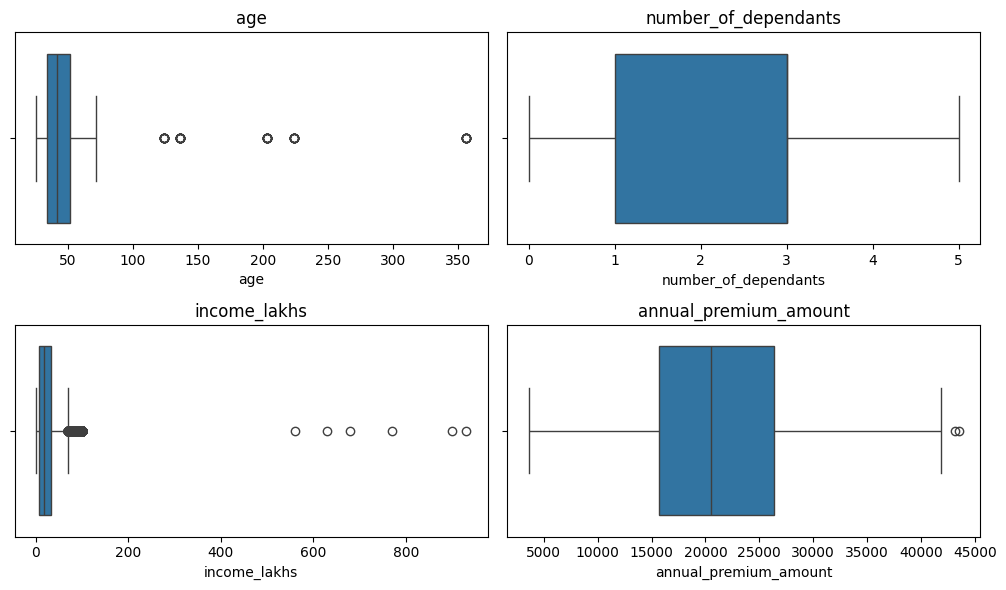

In [128]:
# detect outliers in all the numeric columns
plt.figure(figsize=(10,6))

for i, col in enumerate(numeric_columns[:4]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Outlier Treatment: Age Column

In [129]:
df[df.age>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [130]:
# so based on intutition and discussion with manager age values greater than 100 were removed
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.387790,23.371530,20901.900563,0.0
std,11.041991,1.420641,24.751262,6928.457636,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


### Outlier Treatment: Income Column

In [131]:
def get_iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR= Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return lower_bound,upper_bound

In [132]:
get_iqr_bounds(df1.income_lakhs)

(-30.5, 69.5)

In [133]:
# here we dont need to worry about lower bound as minimum income value is 1. 
# but we should treat income greater than our greater bound, with the discussion with managers or based on domain knowledge.
# a person can have income 67 lakhs per annum
# so we created new thresold of 1cr income with business understanding
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

np.float64(100.0)

In [134]:
# check how many persons has annual income greater than 1Cr
df1[df1.income_lakhs>quantile_thresold].shape

(6, 14)

In [135]:
# only 10 persons have income greater than 1Cr so with discussion with manager removed this 10 entries (treated them as outliers)
df2 = df1[df1.income_lakhs<=quantile_thresold].copy()
print(df2.shape)
df2.describe()

(29822, 14)


,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


In [136]:
# we are not treating outliers in annual_premium_amount as there are only 2 values and premium amount can be that higher than Q3

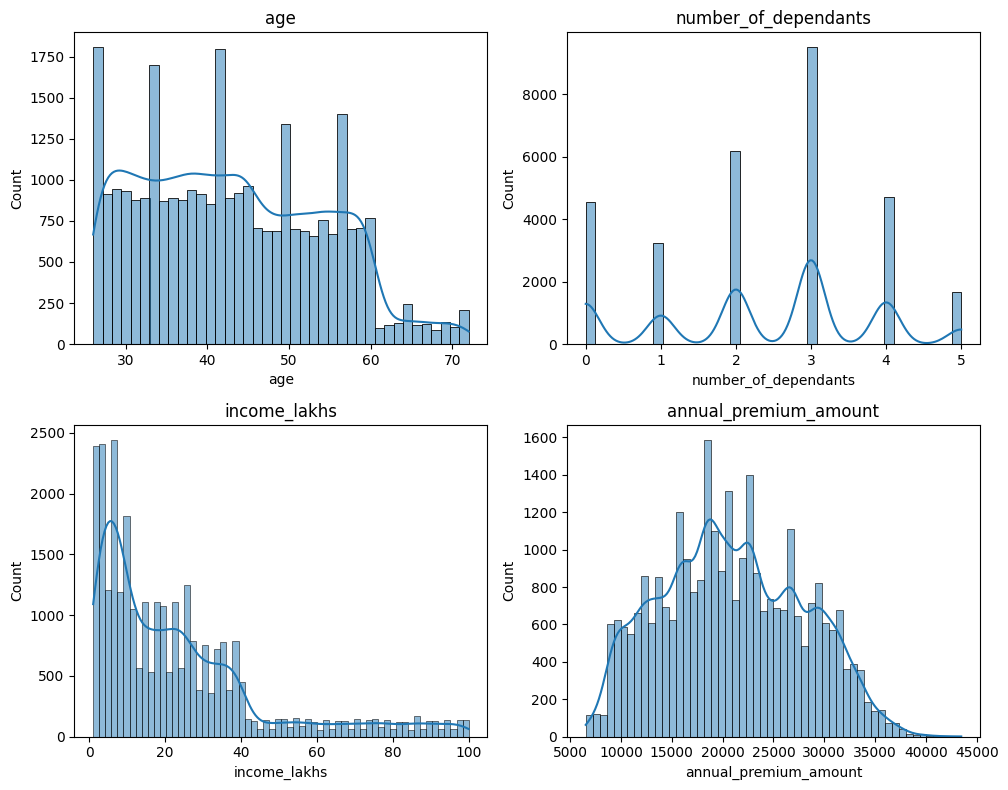

In [137]:
# plotting bar graph with kde plot of all numerical columns to see distribution
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, column in enumerate(numeric_columns[:-1]):  # exclude last column
    ax = axs[i//2, i%2]
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()


### Bivariate Analysis: Numeric Columns

In [138]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

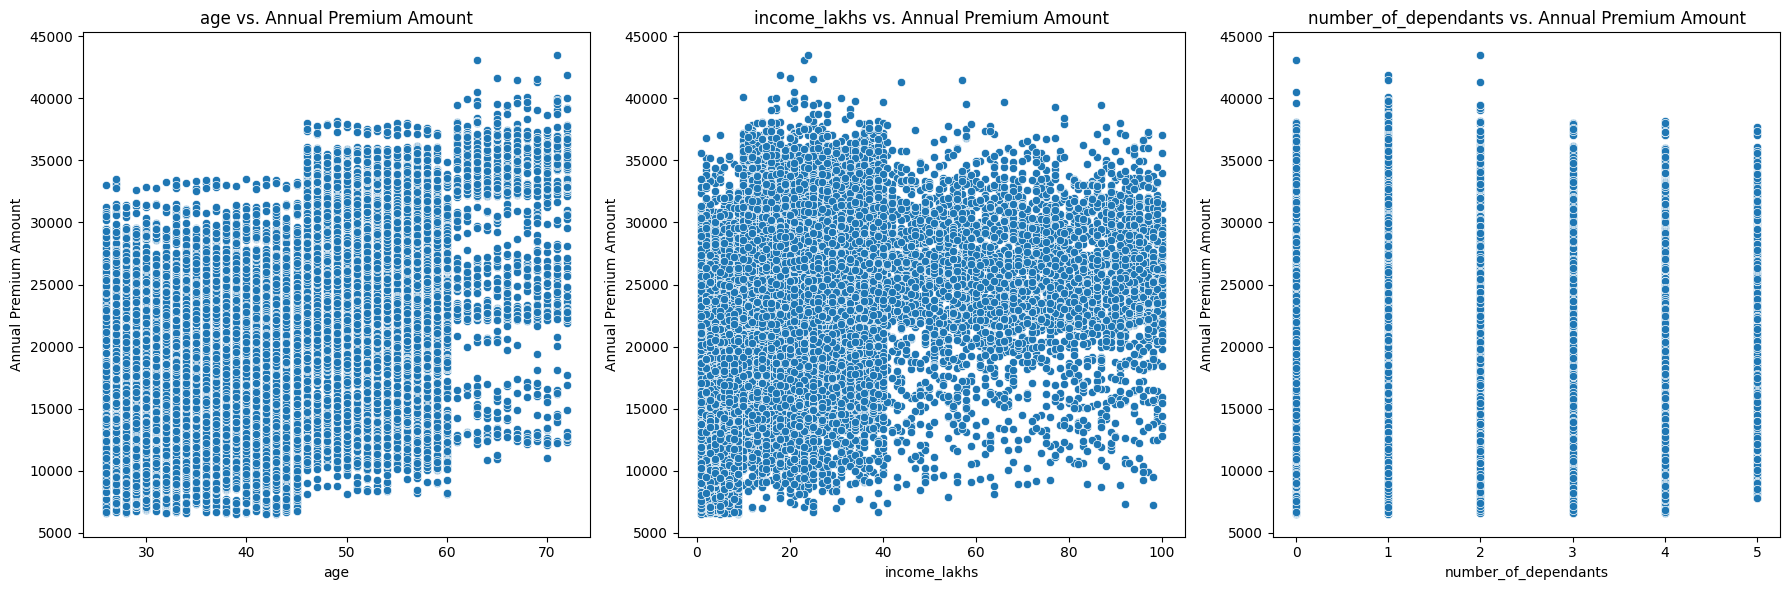

In [139]:
# plotting graphs to see distribution of independent columns w.r.t dependent columns (annual premium amount)
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

## 2. Categorical Columns

In [140]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col,":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [141]:
# in above unique values in smoking_status column we can see that few values have same meaning so will make values uniform
df2['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
},inplace=True)
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

### Univariate Analysis

In [142]:
# checking balance of dataset in gender column
df2['gender'].value_counts()

gender
Male      16376
Female    13446
Name: count, dtype: int64

In [143]:
pct_count = df2['gender'].value_counts(normalize=True) #percentage of data distribution
pct_count

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

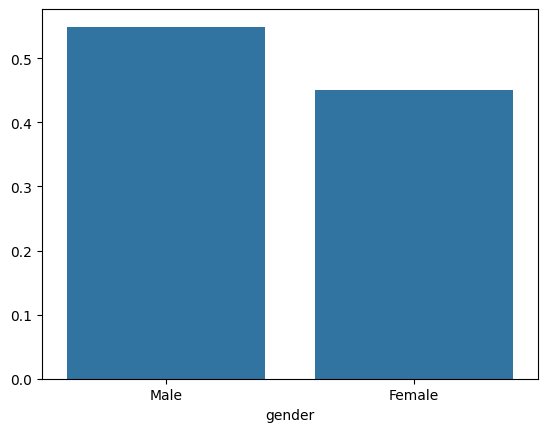

In [144]:
# visual representation of gender column
sns.barplot(x=pct_count.index,y=pct_count.values)
plt.show()

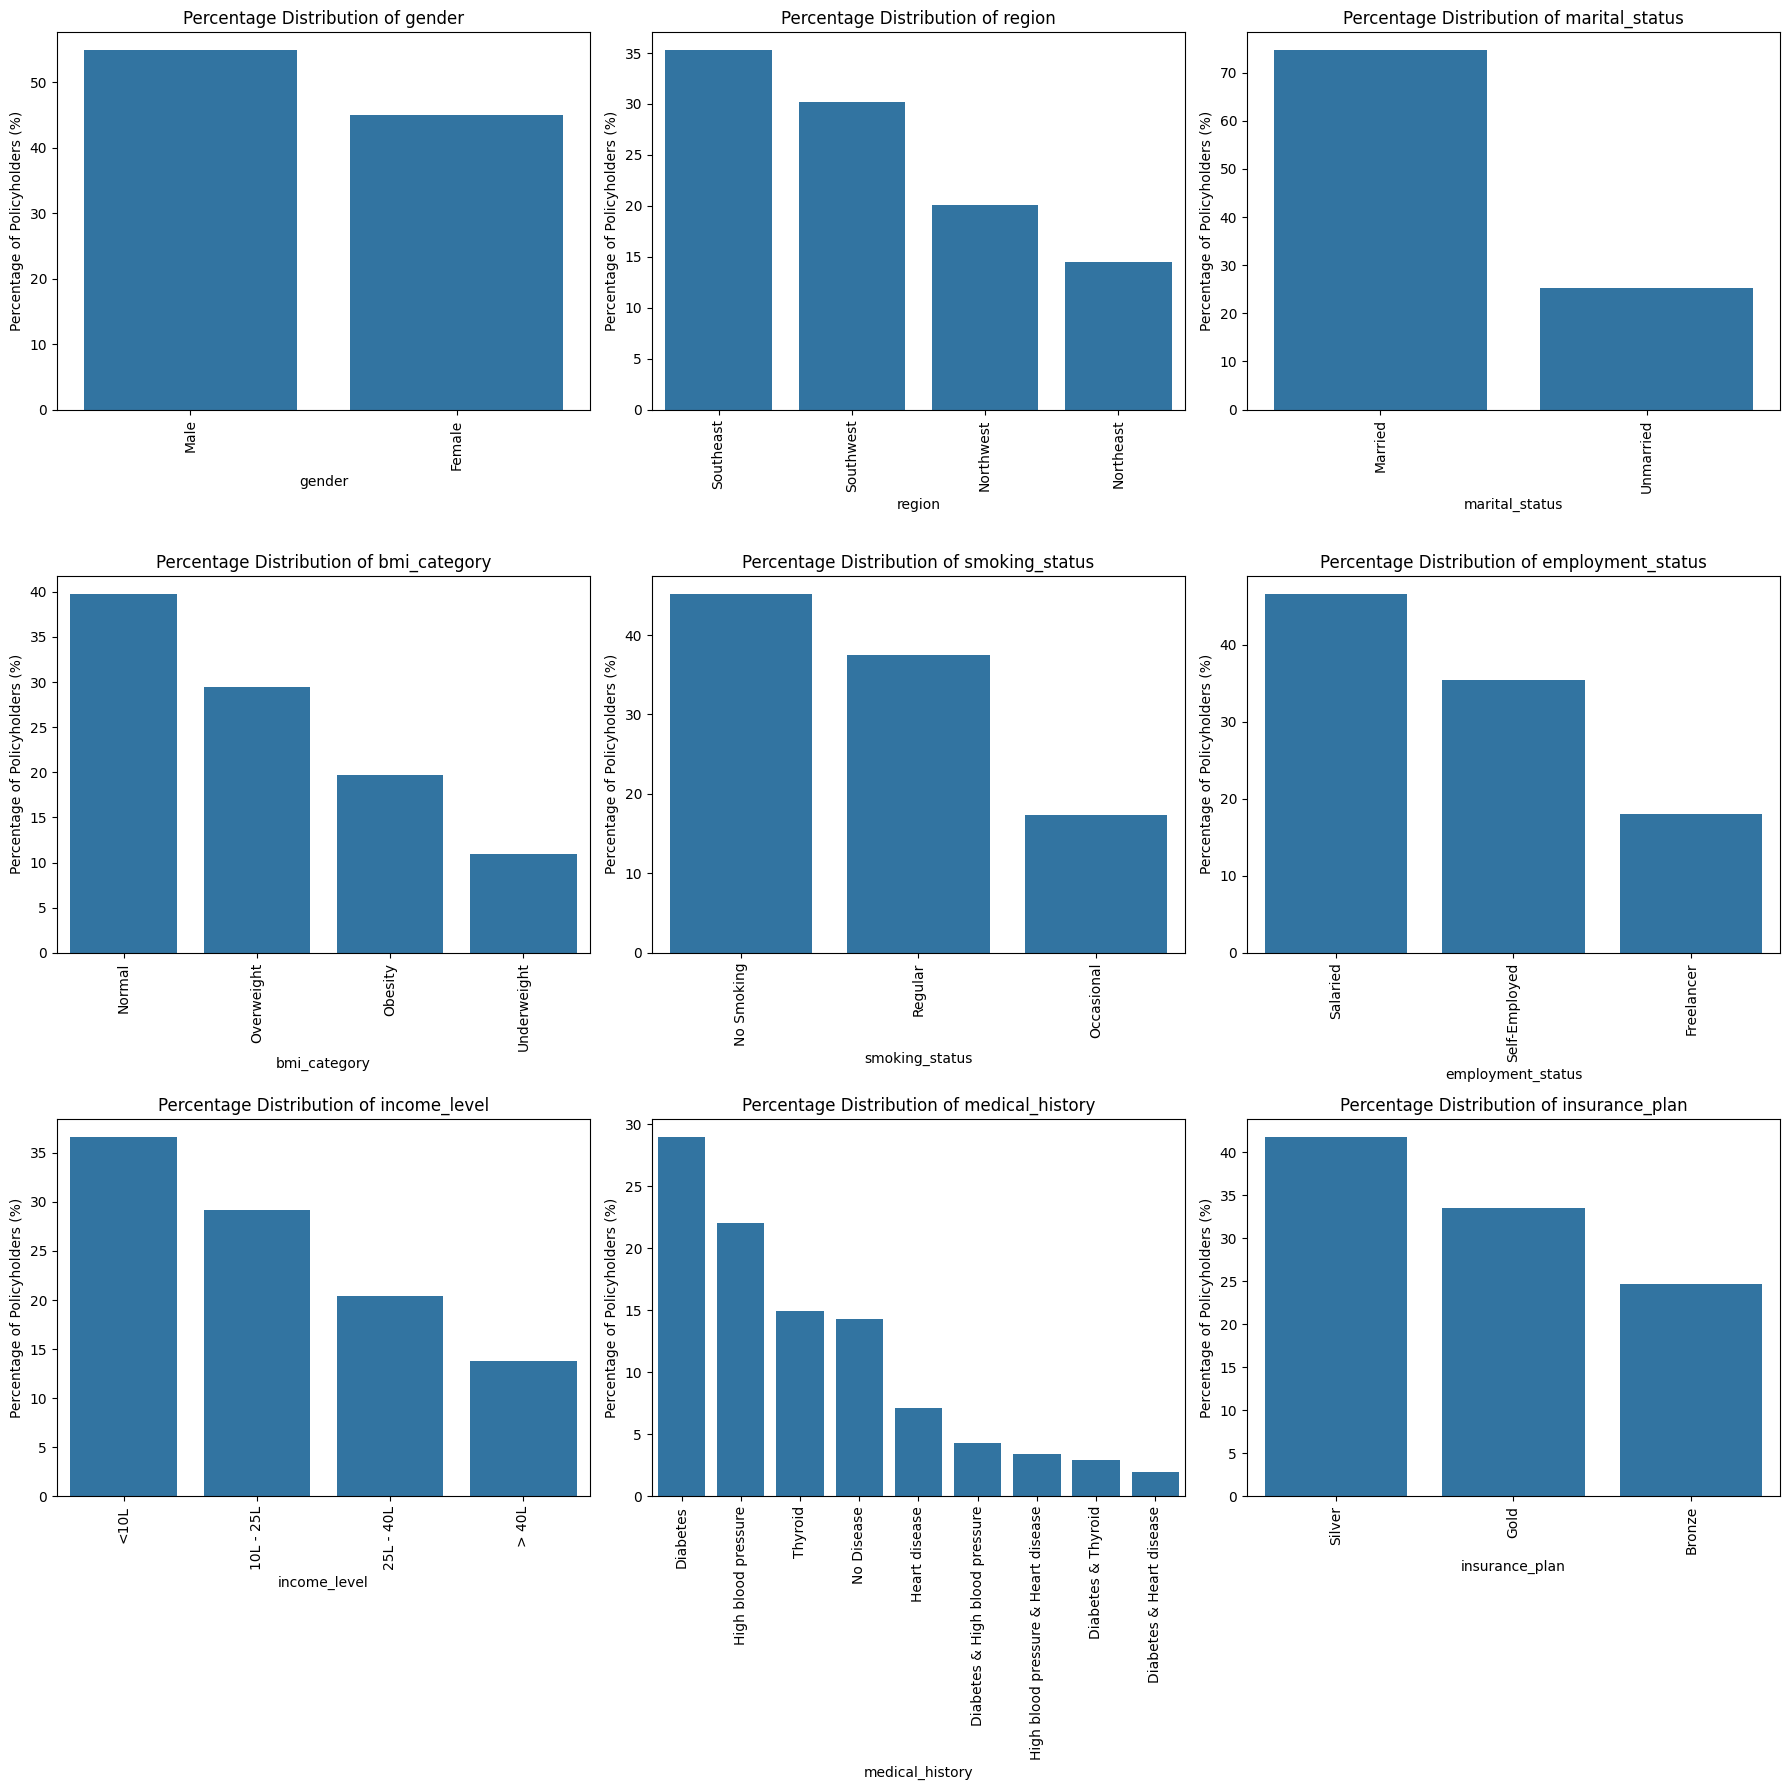

In [145]:
# visual representation of all categorical columns
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

### Bivariate Analysis

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


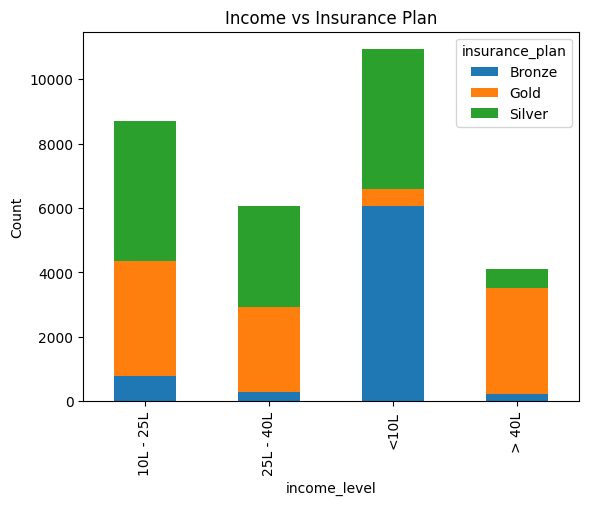

In [146]:
# Cross-tabulation of income level and insurance plan
crosstab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab

print(crosstab)

# Plotting the crosstab
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Insurance Plan')
plt.ylabel('Count')
plt.show()

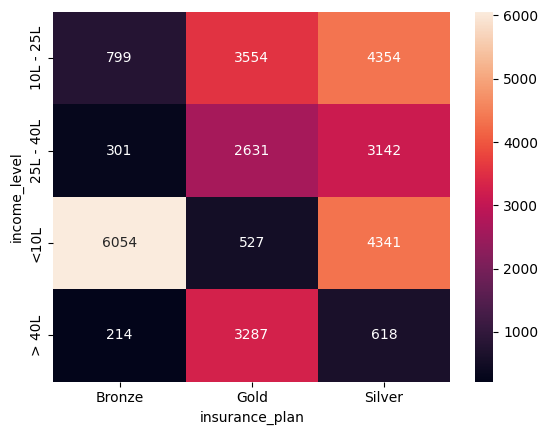

In [147]:
# visual representation of crosstab using heatmap
sns.heatmap(crosstab,annot=True,fmt='d')
plt.show()

<h2 align="center" style="color:navy">Feature Engineering</h2>

In [148]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0


In [149]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [150]:
# healthcare premium is affected by medical history so we need to assign risk score for various disease
risk_scores = {
    
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
    
}
# seperate combined disease ('Diabetes & High blood pressure') into two seperate disease 
df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower())
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
20764,37,Female,Southeast,Married,3,Obesity,No Smoking,Salaried,10L - 25L,12,No Disease,Silver,17508,0,no disease,None
21410,34,Male,Southwest,Married,4,Overweight,Regular,Salaried,<10L,8,High blood pressure,Bronze,13745,0,high blood pressure,None
8125,40,Male,Northwest,Married,4,Normal,Occasional,Freelancer,<10L,8,Diabetes,Bronze,9587,0,diabetes,None
4183,55,Male,Northwest,Married,3,Underweight,Regular,Salaried,> 40L,76,Thyroid,Bronze,14305,0,thyroid,None
21595,33,Male,Southwest,Unmarried,0,Overweight,No Smoking,Self-Employed,> 40L,67,No Disease,Silver,15344,0,no disease,None


In [151]:
# fill null values with none in disease1 & disease2 columns
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')

df2['total_risk_score']=0                #created new column for total risk score
for disease in ['disease1','disease2']:
    df2['total_risk_score']+=df2[disease].map(risk_scores)

In [152]:
df2.sample(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
7759,64,Male,Southeast,Married,1,Overweight,No Smoking,Self-Employed,<10L,7,High blood pressure,Gold,35096,0,high blood pressure,none,6
13710,34,Female,Northwest,Married,3,Normal,Occasional,Salaried,25L - 40L,38,No Disease,Silver,14765,0,no disease,none,0
8791,49,Male,Southeast,Unmarried,1,Normal,No Smoking,Self-Employed,10L - 25L,12,No Disease,Bronze,8774,0,no disease,none,0


In [153]:
# scaling total_risk_score column using min max scaler
max_score=df2['total_risk_score'].max()
min_score=df2['total_risk_score'].min()
df2['normalized_risk_score']=(df2['total_risk_score']-min_score)/(max_score-min_score)
df2.sample(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
23514,32,Female,Northeast,Married,4,Overweight,No Smoking,Self-Employed,25L - 40L,30,High blood pressure,Silver,17571,0,high blood pressure,none,6,0.428571
14734,33,Male,Southeast,Unmarried,0,Obesity,Regular,Salaried,10L - 25L,25,Diabetes,Gold,29064,0,diabetes,none,6,0.428571
6774,29,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,7261,0,no disease,none,0,0.000000


### Encoding Text Columns

In [154]:
# ordinal encoding on insurance plan column as order is important
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [155]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df2.insurance_plan.unique()

array([1, 2, 3])

In [156]:
# ordinal encoding on income level column as order is important
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})


In [157]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,2,14,Diabetes,1,15610,0,diabetes,none,6,0.428571


In [158]:
# remaining categorical columns are nominal so apply one hot encoding and stored in new dataframe (df3)
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1


In [159]:
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount',
       'genetical_risk', 'disease1', 'disease2', 'total_risk_score',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

### Feature Selection

In [160]:
# we created normalised risk score column so now we can drop belowed columns
df4=df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


### Calculate VIF for Multicolinearity

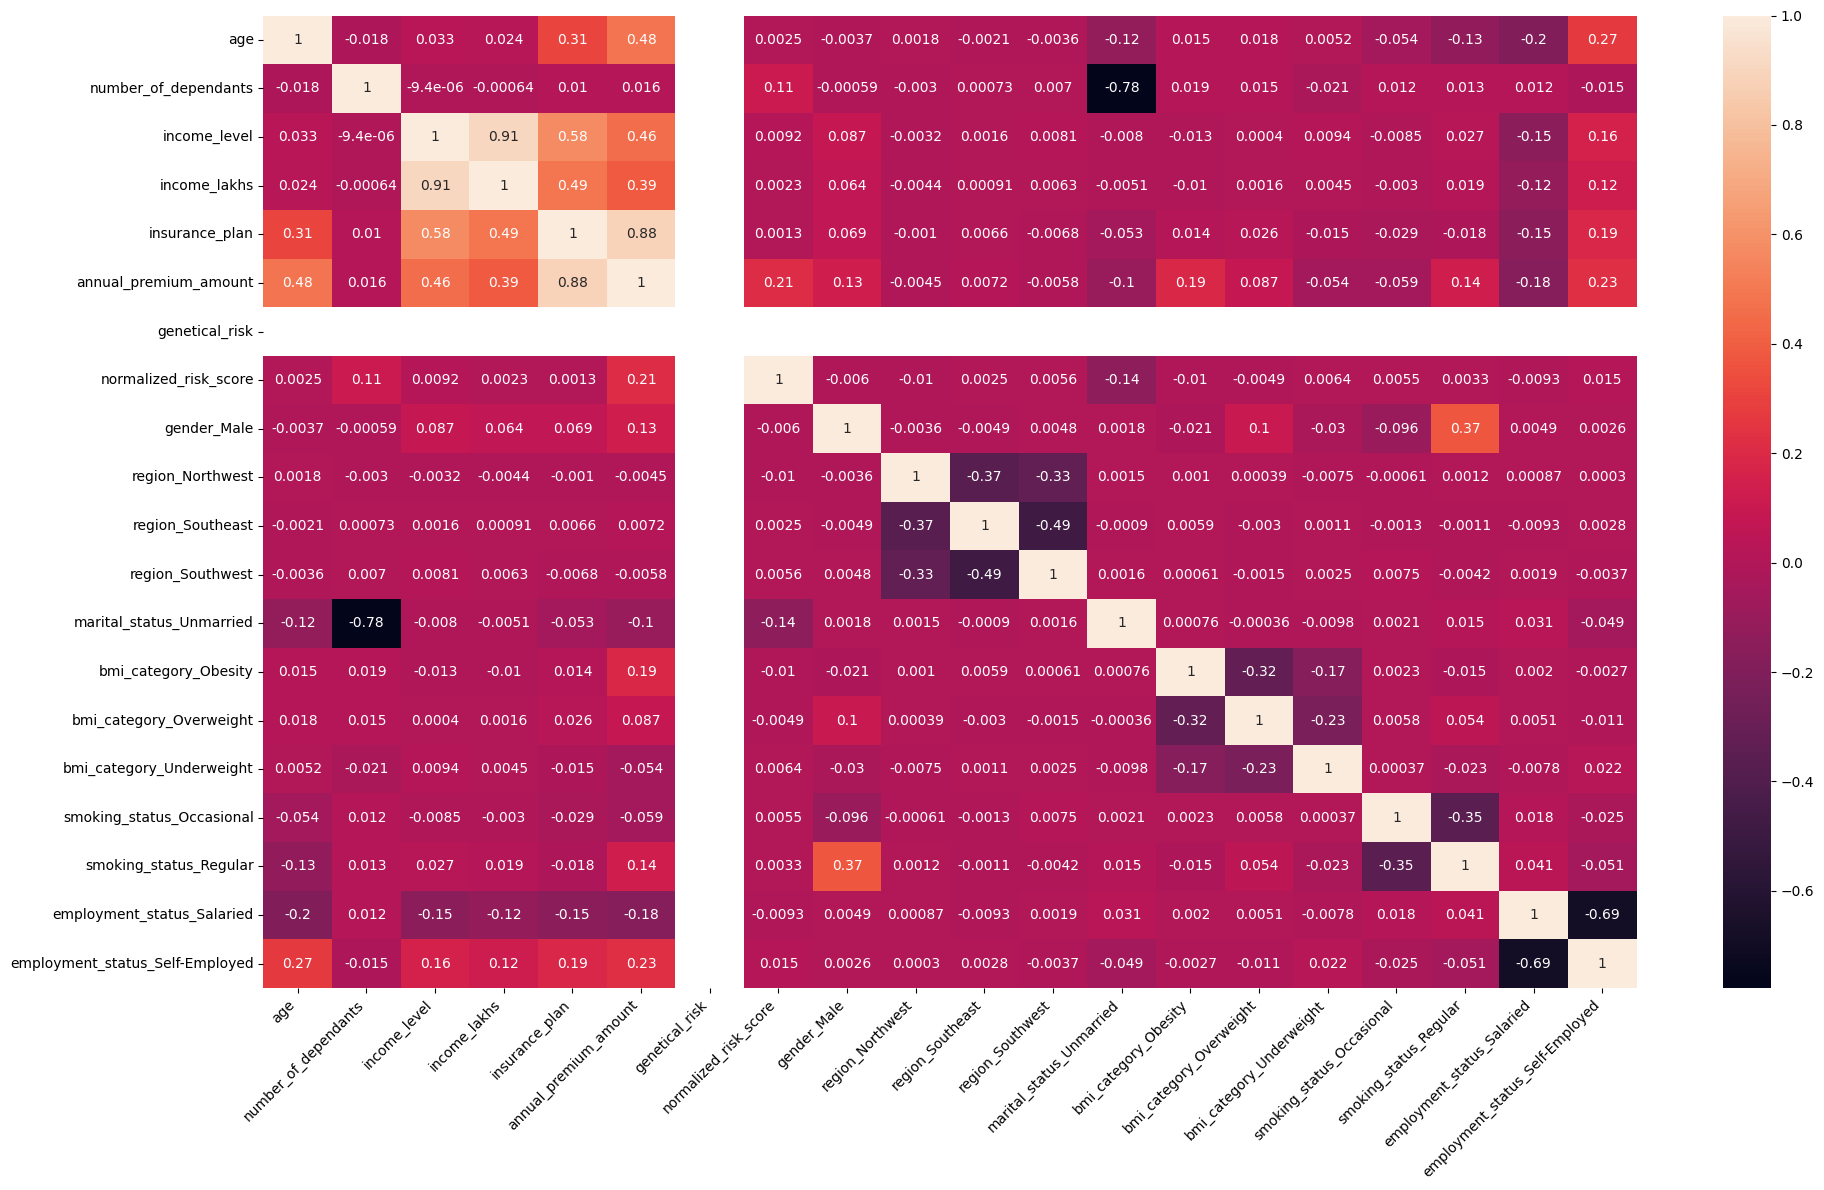

In [161]:
# check correlation
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [162]:
X = df4.drop('annual_premium_amount',axis=1)
y = df4['annual_premium_amount']

In [163]:
# scaling
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [164]:
# calculate vif to check multicollinearity among multiple variables together.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [165]:
calculate_vif(X)
# this warning occurs because the target variable has zero or very low variance, making R² mathematically undefined.
# R2=1−SSE/TSS here, TSS (Total Sum of Squares from mean) = 0 it gives NaN

C:\Users\Tanmay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [166]:
# drop income_level column as VIF is high & now again check VIF
# VIF is dependent on other columns so again VIF get change after droping 1 column
calculate_vif(X.drop('income_level', axis="columns"))

C:\Users\Tanmay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalized_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


In [167]:
# storing X columns after scaling and VIF in new variable
X_reduced = X.drop('income_level', axis="columns")
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


<h2 align="center" style="color:red">Model Training</h2>

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.3,random_state=10)
print('X train: ', X_train.shape)
print('X test: ', X_test.shape)
print('Y train: ', y_train.shape)
print('X test: ', y_test.shape)

X train:  (20875, 18)
X test:  (8947, 18)
Y train:  (20875,)
X test:  (8947,)


### Linear Regression Model

In [169]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
test_score = model_lr.score(X_train,y_train)
train_score = model_lr.score(X_test,y_test)
test_score, train_score

(0.9534163989489616, 0.9538448451629948)

In [170]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  2183844.360312456 RMSE:  1477.7835972538253


In [171]:
X_test.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
19713,0.652174,0.0,0.262626,1.0,0.0,0.428571,0,0,0,1,1,0,0,0,0,0,0,1


In [172]:
# y=mx+c here intercept is c
model_lr.intercept_

np.float64(5935.981289344609)

In [173]:
# y=mx+c here coefficients are m1,m2....
model_lr.coef_

array([ 7016.23932829, -1311.76470171,  -708.19336921, 14835.98820801,
           0.        ,  6053.6241234 ,    37.55826883,   -55.25087215,
         -19.62254288,   -22.28967559,  -700.32019985,  3926.8127061 ,
        1979.45604663,   612.86623617,   837.3951011 ,  2800.66184334,
         -45.49136706,   243.07842087])

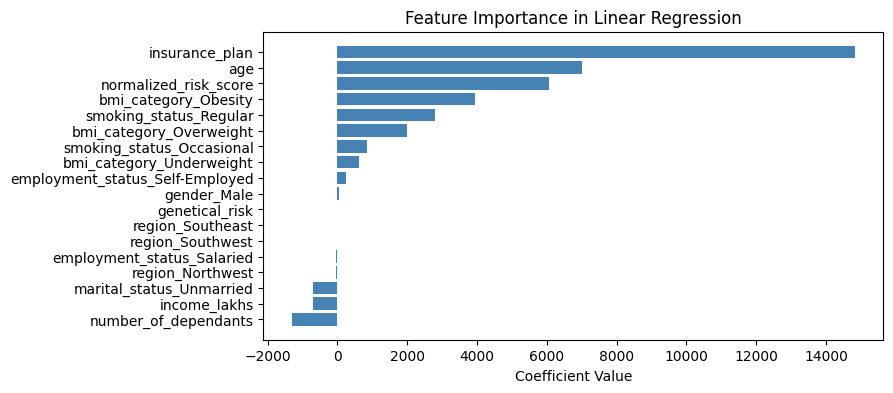

In [174]:
# will plot graph to see important features which will have higher weights
feature_importances = model_lr.coef_

# created dataframe to plot graph
coef_df = pd.DataFrame(feature_importances,index=X_test.columns,columns=['Coefficients'])

# Sorting coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Ridge Regression Model

In [175]:
from sklearn.linear_model import Ridge,Lasso

model_rg = Ridge(alpha=10)
model_rg.fit(X_train,y_train)
test_score = model_rg.score(X_train,y_train)
train_score = model_rg.score(X_test,y_test)
test_score, train_score


(0.9534000354275609, 0.9538387998701963)

In [176]:
y_pred = model_rg.predict(X_test)

mse_rg = mean_squared_error(y_test, y_pred)
rmse_rg = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_rg, "RMSE: ", rmse_rg)

Ridge Regression ==> MSE:  2184130.3950713295 RMSE:  1477.7835972538253


### XGBoost 

In [177]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)
test_score = model_xgb.score(X_train,y_train)
train_score = model_xgb.score(X_test,y_test)
test_score, train_score

(0.9986370801925659, 0.9979538321495056)

In [178]:
y_pred = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBoost Regression ==> MSE: ", mse_xgb, "RMSE: ", rmse_xgb)

XGBoost Regression ==> MSE:  96814.21875 RMSE:  311.1498332797239


### Hyperparameter tuning 

In [179]:
from sklearn.model_selection import RandomizedSearchCV
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],          # number of trees the model builds
    'learning_rate': [0.01, 0.1, 0.2],     # how much each tree contributes to improving the model
    'max_depth': [3, 4, 5],                # maximum depth of each tree
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
# This line creates a RandomizedSearchCV object that tries 10 random hyperparameter combinations, 
# uses 3-fold cross-validation, evaluates with R² score, ensures reproducibility with random_state=42, 
# and uses all CPU cores (n_jobs=-1)

random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9970577955245972)

In [180]:
# best parameters
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [181]:
best_model = random_search.best_estimator_

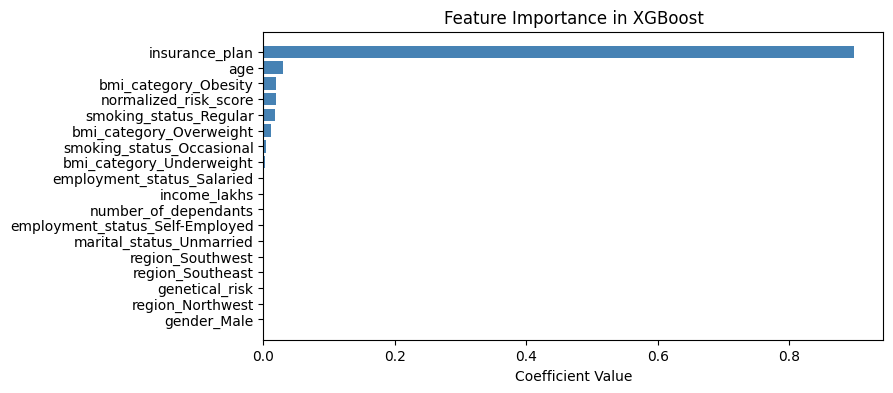

In [182]:
feature_importance = best_model.feature_importances_

# created dataframe to plot graph
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sorting coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)


plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

### Error Analysis

In [183]:
y_pred = best_model.predict(X_test)

residuals = y_pred-y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct':residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26691.470703,-203.529297,-0.756755
14750,22734,22650.751953,-83.248047,-0.366183
19932,21198,21581.894531,383.894531,1.810994
29643,9100,9425.934570,325.934570,3.581699
17076,26434,26691.470703,257.470703,0.974013


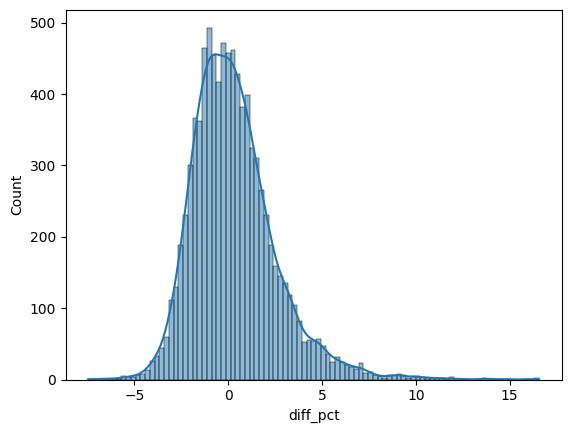

In [184]:
sns.histplot(results_df['diff_pct'],kde=True)
plt.show()

In [185]:
# getting rows where diff percent is more than 10 for both -ve and +ve rows.
extreme_error_threshold = 10   # we can adjust this threshold based on domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df.diff_pct) > extreme_error_threshold]
extreme_results_df.shape

(29, 4)

In [186]:
results_df.shape

(8947, 4)

In [187]:
# percentage of rows where error is more than extreme_error_threshold (10)
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

0.32413099362914943

We have very few extreme errors (only 0.3%) which means this model looks good and no further investigation is required

### Export the Model

In [190]:
from joblib import dump

dump(best_model, "artifacts/model_rest.joblib") #saves our best model in artifacts folder with name model_rest.joblib
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': cols_to_scale 
}
dump(scaler_with_cols, "artifacts/scaler_rest.joblib") #saves our scaler objects and columns in artifacts folder with name scaler_rest.joblib

['artifacts/scaler_rest.joblib']